# Plotting Wind Properties
As described under [Models](../output/model.rst), Python saves wind properties in binary wind_save files. This notebook explains how to read and plot wind variables for the ```cv_standard``` file found in the examples. Before running the python commands, you need to run the model from the command line. I suggest running the following commands, after you have compiled python:

    mkdir cv_test
    cd cv_test
    cp $PYTHON/examples/basic/cv_standard.pf .
    py cv_standard </code>

The model will take about 5 minutes to run on a single core. It will not converge, but will give us a model to use as an example. You should then run ```windsave2table``` on the output

    windsave2table cv_standard

which will create a series of ascii files containing key variables in the wind cells. We will use these ascii files for our plots. 

## Make A Basic Quick Look Wind Plot

The simplest way to make a quick look plot of the electron temperature is using the ```plot_wind.py``` routine in ```$PYTHON/py_progs```. In this example, I will assume py_progs has been added to ```$PATH``` and to ```$PYTHONPATH```. ```plot_wind.py``` can be run from the command line using

    plot_wind.py cv_standard t_e
    
where the second argument is the variable to plot. Alternatively, it can be run from within a python script by doing (where we are now assuming you are running this code from one directory above cv_test):

'cv_test/cv_standard_log_t_e.png'

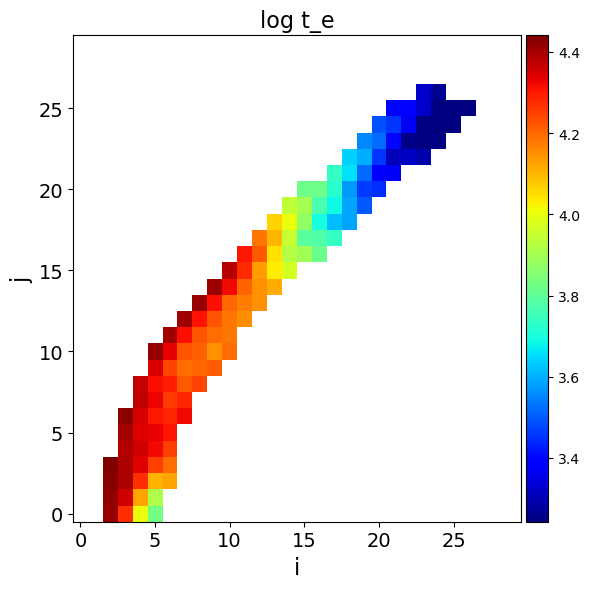

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import plot_wind
fname = "cv_test/cv_standard.master.txt"
plot_wind.doit(fname, var="t_e")

## More detailed/customisable plots

You may, however, wish to get more direct access to the data, which can be done easily by reading in the ```cv_standard.master.txt``` file, for example using ```astropy```. In the next code block, we read in the data file and print out the columns.

In [2]:
import matplotlib.pyplot as plt
import astropy.io.ascii as io 

data = io.read(fname)

print (data.colnames)

['x', 'z', 'xcen', 'zcen', 'i', 'j', 'inwind', 'converge', 'v_x', 'v_y', 'v_z', 'vol', 'rho', 'ne', 't_e', 't_r', 'h1', 'he2', 'c4', 'n5', 'o6', 'dmo_dt_x', 'dmo_dt_y', 'dmo_dt_z', 'ip', 'xi', 'ntot', 'nrad', 'nioniz']


 The ```py_plot_util``` script in py_progs comes with a handy guide to the main columns in the .master.txt file and returns a dictionary containing the description for all variables.

In [3]:
import py_plot_util as util  
descr = util.get_windsave_descriptions(data)

no description for column x
z          --  left-hand lower cell corner z-coordinate, cm
xcen       --  cell centre x-coordinate, cm
zcen       --  cell centre z-coordinate, cm
i          --  cell index (column)
j          --  cell index (row)
inwind     --  is the cell in wind (0), partially in wind (1) or out of wind (<0)
converge   --  how many convergence criteria is the cell failing?
v_x        --  x-velocity, cm/s
v_y        --  y-velocity, cm/s
v_z        --  z-velocity, cm/s
vol        --  volume in cm^3
rho        --  density in g/cm^3
ne         --  electron density in cm^-3
t_e        --  electron temperature in K
t_r        --  radiation temperature in K
h1         --  H1 ion fraction
he2        --  He2 ion fraction
c4         --  C4 ion fraction
n5         --  N5 ion fraction
o6         --  O6 ion fraction
dmo_dt_x   --  momentum rate, x-direction
dmo_dt_y   --  momentum rate, y-direction
dmo_dt_z   --  momentum rate, z-direction
ip         --  U ionization parameter
xi    

```py_plot_util``` also contains some routines for reshaping and masking arrays and so on. One of the most useful for plotting is the ```wind_to_masked``` function which turns the raw 1D flattened data into a masked 2D array with the right shape which can be easily used with ```pcolormesh``` and so on. Here's an example plot of the electron density in the model.

/Users/matthewsj/.mpi_temp/ipykernel_31972/816639112.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x,z, np.log10(ne))


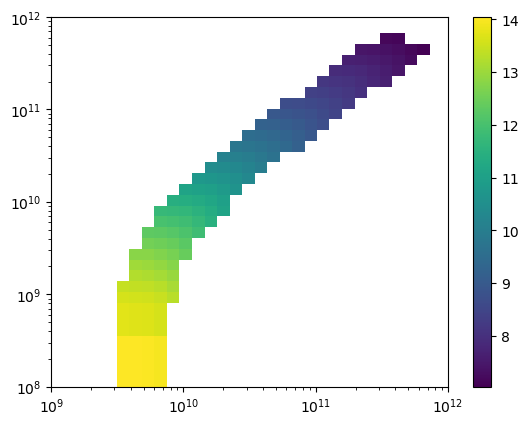

In [4]:
x, z, ne, inwind = util.wind_to_masked(data, value_string="ne", return_inwind=True)
plt.pcolormesh(x,z, np.log10(ne))
plt.loglog()
plt.xlim(1e9,1e12)
plt.ylim(1e8,1e12)
cbar = plt.colorbar()

This procedure can be used to plot any of the variables in the masterfile and is a good starting point for delving into the properties of the wind. 

To make a simple multi-panel plot of wind properties, you can use some of the routines in ```py_plot_output```. The example below plots all the variables passed in an array and saves the file as ```cv_standard_wind.png```

/Users/matthewsj/opt/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3474: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/Users/matthewsj/winds/python/py_progs/py_plot_output.py:301: RuntimeWarning: divide by zero encountered in log10
  p.pcolormesh(x,z,np.log10(v))


7363719978102.189
12772.992700729927
37305.83941605839
1214.8115635036497
11854.087591240876
145555532.84671533
5.267621167883212e-06
0.41242660718248175


0

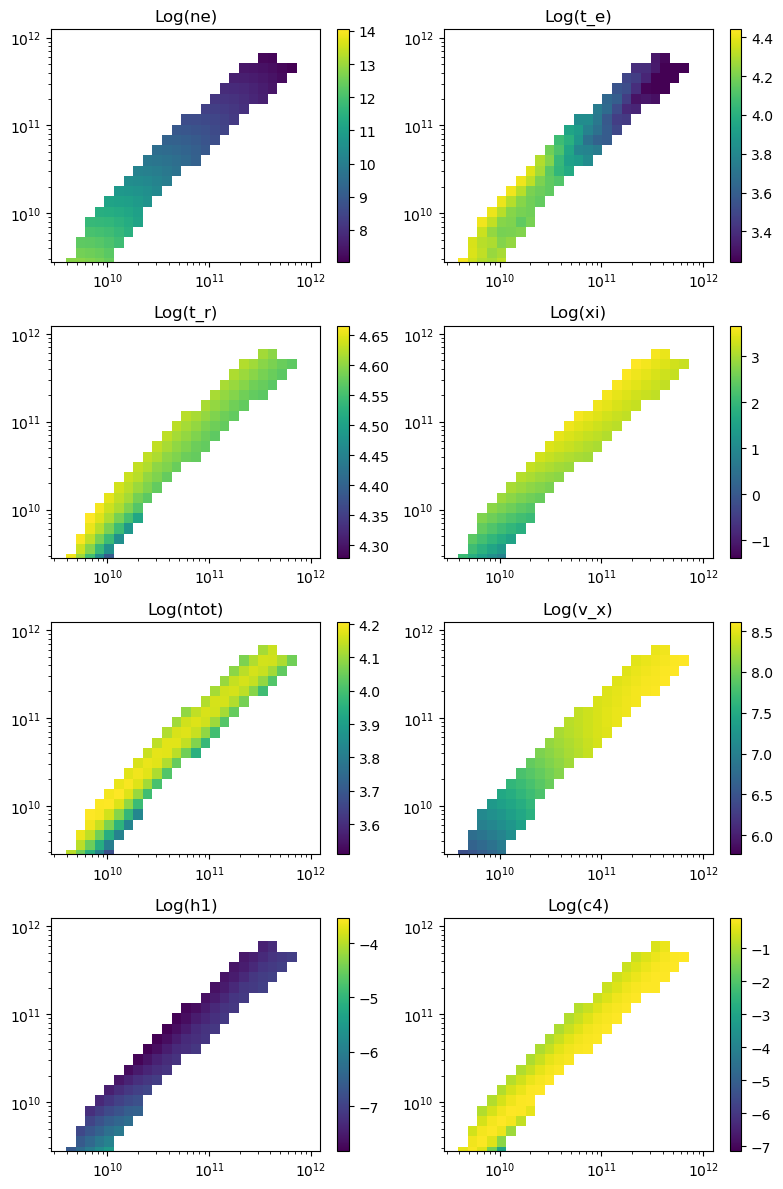

In [5]:
import py_plot_output as plot 
plot.make_wind_plot(data, "cv_standard_wind", var = ["ne", "t_e", "t_r", "xi", "ntot", "v_x", "h1", "c4"], shape=(4,2) )

## Plotting Ion Populations 

Ion populations outputted from ```windsave2table``` are stored in files like ```cv_standard.C.frac.txt```, where the letter before frac denotes the element. Plots of the C III ion fraction can thus be made through commands like the following, where strings like ```i05``` index the ion for each file. 


/Users/matthewsj/.mpi_temp/ipykernel_31972/4163463376.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x,z, np.log10(c3_frac))


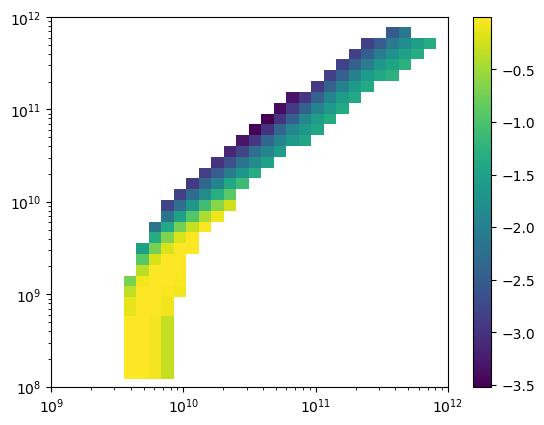

In [6]:
carbon_ion = io.read("cv_test/cv_standard.C.frac.txt")
x, z, c3_frac, inwind = util.wind_to_masked(carbon_ion, value_string="i03", return_inwind=True)
plt.pcolormesh(x,z, np.log10(c3_frac))
plt.loglog()
plt.xlim(1e9,1e12)
plt.ylim(1e8,1e12)
cbar = plt.colorbar()